Witsarut Wongsim 6420422017 

Downloaded Dataset

In [1]:
!gdown --id 1gJMWqrM9a4ory0KTpYiM4pZDxFqqu4K3


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gJMWqrM9a4ory0KTpYiM4pZDxFqqu4K3
To: /content/titanic.csv
100% 29.5k/29.5k [00:00<00:00, 36.2MB/s]


##1. Collect Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


##2. Clean Data

In [5]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
display_missing(df)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




Overview correlation

In [6]:
df_check=df.copy()

In [7]:
df_check['AgeBand'] = pd.cut(df_check['Age'], 5)
df_check[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0942, 15.336]",0.406250
1,"(15.336, 30.502]",0.380952
2,"(30.502, 45.668]",0.350000
3,"(45.668, 60.834]",0.428571
4,"(60.834, 76.0]",0.400000


In [8]:
df_check[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=True)

,Sex,Survived
0,female,1.0
1,male,0.0


In [9]:
df_check[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


In [10]:
df_check['FareBand'] = pd.cut(df_check['Fare'], 4)
df_check[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.347938
1,"(128.082, 256.165]",0.523810
2,"(256.165, 384.247]",0.714286
3,"(384.247, 512.329]",1.000000


Missing value Age

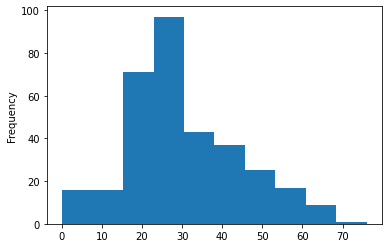

In [11]:
df.Age.plot.hist()

Correlation

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [13]:
df_all_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
10,Age,Pclass,0.492143
12,Age,Fare,0.337932
28,Age,SibSp,0.091587
30,Age,Parch,0.061249
34,Age,PassengerId,0.034102
47,Age,Survived,0.000013


In [14]:
df_1=df.copy()

In [15]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass']).median()['Age']

In [16]:
age_by_pclass_sex

Sex     Pclass
female  1         41.0
        2         24.0
        3         22.0
male    1         42.0
        2         28.0
        3         24.0
Name: Age, dtype: float64

In [17]:
df_1['Age'] = df_1.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


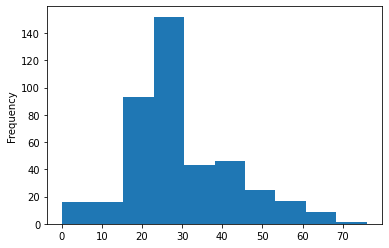

In [18]:
df_1.Age.plot.hist()

Missing value Fare

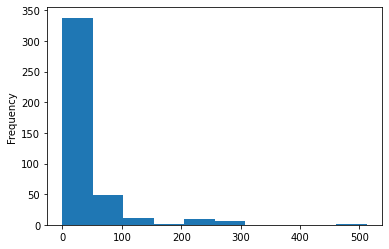

In [19]:
df_1.Fare.plot.hist()

In [20]:
df_1[df_1['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
df_all_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Fare']

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Fare,1.000000
7,Fare,Pclass,0.577147
11,Fare,Age,0.337932
15,Fare,Parch,0.230046
18,Fare,Survived,0.191514
19,Fare,SibSp,0.171539
41,Fare,PassengerId,0.008211


In [22]:
med_fare = df_1.groupby(['Pclass']).Fare.median() 
med_fare

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [23]:
med_fare = pd.DataFrame(med_fare)

In [24]:
med_fare

,Fare
Pclass,
1,60.0000
2,15.7500
3,7.8958


In [25]:
med_fare=med_fare.iloc[2,0]

In [26]:
df_1['Fare'] = df_1['Fare'].fillna(med_fare)

In [27]:
df_1.iloc[[152]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.8958,NaN,S


Missing value Cabin

In [28]:
df_1['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

Text(0, 0.5, 'Frequency')

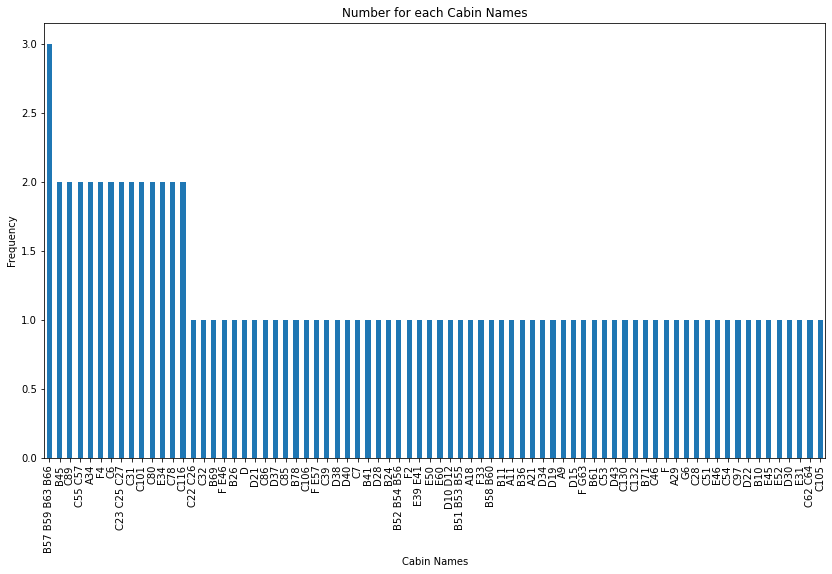

In [29]:
ax = df_1['Cabin'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Cabin Names")
ax.set_xlabel("Cabin Names")
ax.set_ylabel("Frequency")

In [30]:
display_missing(df_1)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 327
Embarked column missing values: 0




In [31]:
df_1=df_1.drop(['Cabin'], axis=1)

In [32]:
display_missing(df_1)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Embarked column missing values: 0




##3.Feature engineering

## One-Hot End coding

Example

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [35]:
# creating initial dataframe
sex = ('female','male')
sex_df = pd.DataFrame(sex, columns=['sex'])

In [36]:
sex_df

,sex
0,female
1,male


In [37]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(sex_df, columns=["sex"], prefix=["sex_is"] )

In [38]:
dum_df 

,sex_is_female,sex_is_male
0,1,0
1,0,1


In [39]:
# merge with main df bridge_df on key values
sex_df  = sex_df.join(dum_df)
sex_df 

,sex,sex_is_female,sex_is_male
0,female,1,0
1,male,0,1


# Sex

Text(0, 0.5, 'Frequency')

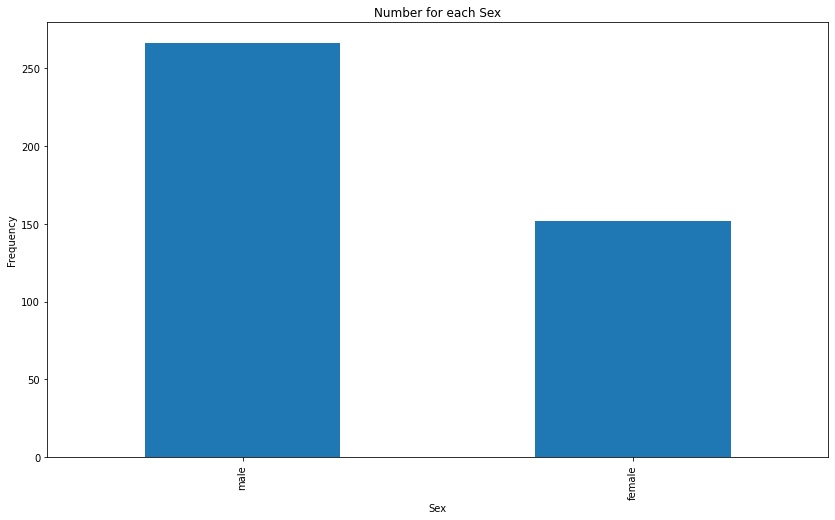

In [40]:
ax = df_1['Sex'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

In [41]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(df_1[['Sex']], columns=["Sex"], prefix=["Sex_is"] )

In [42]:
dum_df

,Sex_is_female,Sex_is_male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [43]:
df_onehot  = df_1.join(dum_df)


In [44]:
df_onehot.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_is_female,Sex_is_male
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,0


In [45]:
df_onehot=df_onehot.drop(['Sex'], axis=1)
df_onehot

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_is_female,Sex_is_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0,1
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",24.0,0,0,A.5. 3236,8.0500,S,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C,1,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,1308,0,3,"Ware, Mr. Frederick",24.0,0,0,359309,8.0500,S,0,1


Embarked

Text(0, 0.5, 'Frequency')

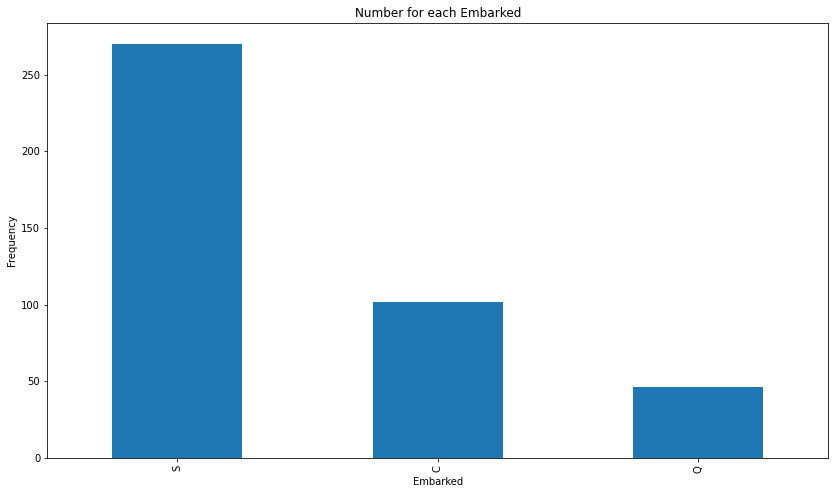

In [46]:
ax = df_1['Embarked'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Embarked")
ax.set_xlabel("Embarked")
ax.set_ylabel("Frequency")

In [47]:
dum_df = pd.get_dummies(df_onehot[['Embarked']], columns=["Embarked"], prefix=["Embarked_is"] )

In [48]:
dum_df.head()

,Embarked_is_C,Embarked_is_Q,Embarked_is_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [49]:
df_onehot= df_onehot.join(dum_df)

In [50]:
df_onehot=df_onehot.drop(['Embarked'], axis=1)
df_onehot

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",24.0,0,0,A.5. 3236,8.0500,0,1,0,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,1,0,1,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,0,1
416,1308,0,3,"Ware, Mr. Frederick",24.0,0,0,359309,8.0500,0,1,0,0,1


In [51]:
df_onehot=df_onehot.drop(['Name'], axis=1)
df_onehot

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S
0,892,0,3,34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,1,3,47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,0,2,62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,0,3,27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,1,3,22.0,1,1,3101298,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,24.0,0,0,A.5. 3236,8.0500,0,1,0,0,1
414,1306,1,1,39.0,0,0,PC 17758,108.9000,1,0,1,0,0
415,1307,0,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,0,1
416,1308,0,3,24.0,0,0,359309,8.0500,0,1,0,0,1


In [52]:
df_onehot=df_onehot.drop(['Ticket'], axis=1)
df_onehot

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S
0,892,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,1,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,24.0,0,0,8.0500,0,1,0,0,1
414,1306,1,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,0,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,0,3,24.0,0,0,8.0500,0,1,0,0,1


Pclass

Text(0, 0.5, 'Frequency')

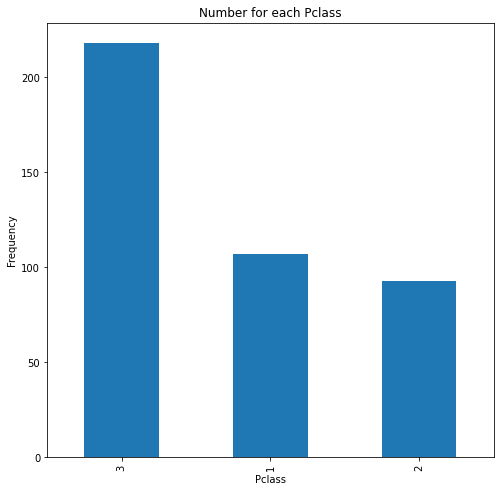

In [53]:
ax = df_1['Pclass'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Number for each Pclass")
ax.set_xlabel("Pclass")
ax.set_ylabel("Frequency")

In [54]:
dum_df = pd.get_dummies(df_onehot[['Pclass']], columns=["Pclass"], prefix=["Pclass_is"] )
dum_df 

,Pclass_is_1,Pclass_is_2,Pclass_is_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [55]:
df_onehot= df_onehot.join(dum_df)
df_onehot=df_onehot.drop(['Pclass'], axis=1)
df_onehot

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S,Pclass_is_1,Pclass_is_2,Pclass_is_3
0,892,0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,893,1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,894,0,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,0,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,896,1,22.0,1,1,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,24.0,0,0,8.0500,0,1,0,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0,1,0,0
415,1307,0,38.5,0,0,7.2500,0,1,0,0,1,0,0,1
416,1308,0,24.0,0,0,8.0500,0,1,0,0,1,0,0,1


Text(0, 0.5, 'Frequency')

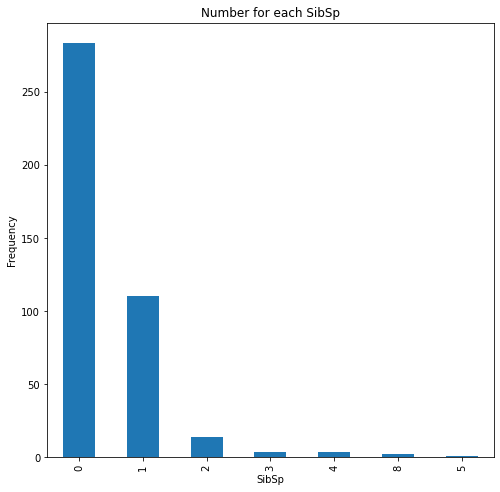

In [56]:
ax = df_1['SibSp'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Number for each SibSp")
ax.set_xlabel("SibSp")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

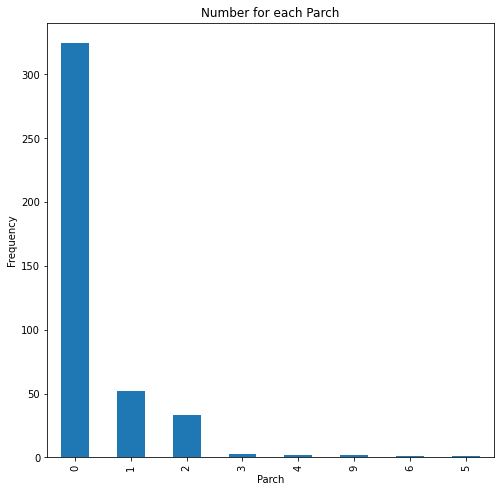

In [57]:
ax = df_1['Parch'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Number for each Parch")
ax.set_xlabel("Parch")
ax.set_ylabel("Frequency")

In [58]:
scaled_features=df_onehot.copy()

*Standardization*

In [59]:
# Scaling between -3 and 3. Good practice for continuous variables.
from sklearn.preprocessing import StandardScaler
col_names = ['Fare', 'Age','SibSp','Parch']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [60]:
scaled_features[col_names] = features

In [61]:
scaled_features

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S,Pclass_is_1,Pclass_is_2,Pclass_is_3
0,892,0,0.399451,-0.499470,-0.400248,-0.497071,0,1,0,1,0,0,0,1
1,893,1,1.359273,0.616992,-0.400248,-0.511934,1,0,0,0,1,0,0,1
2,894,0,2.511059,-0.499470,-0.400248,-0.463762,0,1,0,1,0,0,1,0
3,895,0,-0.176442,-0.499470,-0.400248,-0.482135,0,1,0,0,1,0,0,1
4,896,1,-0.560371,0.616992,0.619896,-0.417159,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,-0.406799,-0.499470,-0.400248,-0.493113,0,1,0,0,1,0,0,1
414,1306,1,0.744987,-0.499470,-0.400248,1.314555,1,0,1,0,0,1,0,0
415,1307,0,0.706594,-0.499470,-0.400248,-0.507453,0,1,0,0,1,0,0,1
416,1308,0,-0.406799,-0.499470,-0.400248,-0.493113,0,1,0,0,1,0,0,1


#Feature Selection

In [62]:
X=scaled_features.iloc[:,2:]

In [63]:
X

,Age,SibSp,Parch,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S,Pclass_is_1,Pclass_is_2,Pclass_is_3
0,0.399451,-0.499470,-0.400248,-0.497071,0,1,0,1,0,0,0,1
1,1.359273,0.616992,-0.400248,-0.511934,1,0,0,0,1,0,0,1
2,2.511059,-0.499470,-0.400248,-0.463762,0,1,0,1,0,0,1,0
3,-0.176442,-0.499470,-0.400248,-0.482135,0,1,0,0,1,0,0,1
4,-0.560371,0.616992,0.619896,-0.417159,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.406799,-0.499470,-0.400248,-0.493113,0,1,0,0,1,0,0,1
414,0.744987,-0.499470,-0.400248,1.314555,1,0,1,0,0,1,0,0
415,0.706594,-0.499470,-0.400248,-0.507453,0,1,0,0,1,0,0,1
416,-0.406799,-0.499470,-0.400248,-0.493113,0,1,0,0,1,0,0,1


In [64]:
y=scaled_features["Survived"]

In [65]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

#Split Train set Test set 

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [68]:
len(X_train)

334

In [69]:
X_train.sample(10)

,Age,SibSp,Parch,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S,Pclass_is_1,Pclass_is_2,Pclass_is_3
287,-0.406799,0.616992,-0.400248,0.837171,0,1,0,0,1,1,0,0
263,-2.172871,0.616992,0.619896,-0.419027,1,0,0,0,1,0,0,1
170,-0.406799,-0.499470,-0.400248,-0.502075,0,1,0,0,1,0,0,1
146,0.975344,-0.499470,-0.400248,0.292196,0,1,0,0,1,1,0,0
26,-0.560371,-0.499470,0.619896,0.473531,1,0,1,0,0,1,0,0
91,-0.406799,-0.499470,-0.400248,-0.498042,0,1,0,0,1,0,0,1
182,-0.867514,0.616992,-0.400248,0.314377,1,0,0,0,1,1,0,0
309,1.205702,0.616992,-0.400248,-0.384522,1,0,0,0,1,0,0,1
66,-0.867514,-0.499470,-0.400248,-0.496175,1,0,0,1,0,0,0,1
38,-0.330013,-0.499470,-0.400248,-0.467123,0,1,0,0,1,0,0,1


In [70]:
len(X_test)

84

In [71]:
X_test.sample(10)

,Age,SibSp,Parch,Fare,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S,Pclass_is_1,Pclass_is_2,Pclass_is_3
186,-0.637156,-0.499470,0.619896,-0.260993,1,0,0,0,1,0,1,0
137,-0.253228,-0.499470,-0.400248,-0.404388,0,1,0,0,1,0,1,0
307,-2.185925,-0.499470,0.619896,-0.469812,0,1,0,0,1,0,0,1
207,-0.406799,-0.499470,-0.400248,-0.449199,0,1,0,0,1,0,1,0
89,-2.096086,0.616992,0.619896,-0.225145,0,1,0,0,1,0,1,0
416,-0.406799,-0.499470,-0.400248,-0.493113,0,1,0,0,1,0,0,1
1,1.359273,0.616992,-0.400248,-0.511934,1,0,0,0,1,0,0,1
117,-2.172871,0.616992,0.619896,-0.338068,1,0,0,0,1,0,0,1
175,-1.097871,-0.499470,1.640039,0.061645,1,0,0,0,1,0,1,0
4,-0.560371,0.616992,0.619896,-0.417159,1,0,0,0,1,0,0,1


In [72]:
len(y_train)

334

In [73]:
y_train.sample(10)

228    0
249    1
277    0
10     0
41     0
364    1
6      1
2      0
349    1
336    0
Name: Survived, dtype: int64

In [74]:
len(y_test)

84

In [75]:
y_test.sample(10)

307    0
42     0
351    0
298    0
185    0
181    0
261    0
148    0
142    0
34     0
Name: Survived, dtype: int64

#4. Train Model Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [77]:
y_predict = log_model.predict(X_test)

In [78]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [79]:
y_test

189    0
42     0
389    0
329    0
261    0
      ..
226    0
111    1
407    0
286    0
185    0
Name: Survived, Length: 84, dtype: int64

##5.Model Evaluation

score of model's performance

In [80]:
log_model.score(X_test,y_test)

1.0

In [83]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[52  0]
 [ 0 32]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


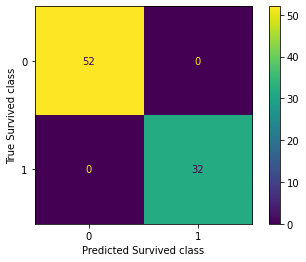

Accuracy = 1.0


In [84]:
plot_confusion_matrix(log_model, X_test, y_test)
plt.xlabel("Predicted Survived class")
plt.ylabel("True Survived class")
plt.show()
print("Accuracy =",log_model.score(X_test,y_test))

In [85]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [86]:
# predict probabilities
lr_probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [87]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


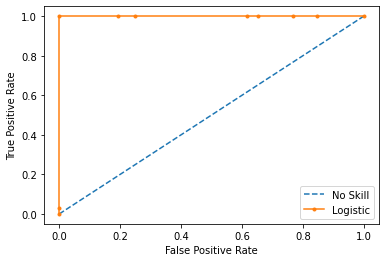

In [88]:
from matplotlib import pyplot
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Feature importance

In [89]:
features=[]
for i in range (12):
    features.append(X_test.columns[i])
features

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_is_female',
 'Sex_is_male',
 'Embarked_is_C',
 'Embarked_is_Q',
 'Embarked_is_S',
 'Pclass_is_1',
 'Pclass_is_2',
 'Pclass_is_3']

[[-0.07658886  0.05744064  0.11383887  0.19732522  3.68754914 -3.68754141
  -0.05065484  0.20902952 -0.15836694  0.09955913 -0.01504307 -0.08450832]]
Feature:Age , Score:-0.07658886120099219
Feature:SibSp , Score:0.057440642946936626
Feature:Parch , Score:0.11383887085909163
Feature:Fare , Score:0.19732522034182937
Feature:Sex_is_female , Score:3.6875491428932103
Feature:Sex_is_male , Score:-3.6875414073418034
Feature:Embarked_is_C , Score:-0.050654843382355014
Feature:Embarked_is_Q , Score:0.20902952290650076
Feature:Embarked_is_S , Score:-0.15836694397273984
Feature:Pclass_is_1 , Score:0.09955913107901382
Feature:Pclass_is_2 , Score:-0.015043071312831462
Feature:Pclass_is_3 , Score:-0.08450832421477646


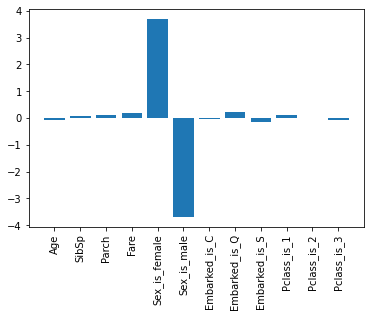

In [90]:
# The estimated coefficients will all be around 1:
print(log_model.coef_)
importance = log_model.coef_[0]
for i,v in enumerate(importance):
	print(f'Feature:{features[i]} , Score:{v}')
# plot feature importance
pyplot.bar(features, importance)
plt.xticks(rotation = 90)
pyplot.show()